In [1]:
!tar chvfz notebook.tar.gz *

CEC.parquet
CEC.parquet.gzip
Corporate_Energy_Consumption_20240627.csv
Data Ingestion via APIs.ipynb
Intro to Parquet.ipynb
part_data/
part_data/Year=2021/
part_data/Year=2021/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2017/
part_data/Year=2017/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2019/
part_data/Year=2019/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2020/
part_data/Year=2020/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2016/
part_data/Year=2016/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2015/
part_data/Year=2015/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2022/
part_data/Year=2022/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2018/
part_data/Year=2018/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2014/
part_data/Year=2014/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2024/
part_data/Year=2024/eb8263f8c8674a4fa9028b72a19ef32b-0.parquet
part_data/Year=2023/
part

# Data Ingestion via APIs

*Further Reading*

- Foundations of Data Engineering, by Reis and Housley (Chapter 7)
- [Getting started with SODA consumer API](https://dev.socrata.com/consumers/getting-started.html)

*Additional Helpful Packages*

- [`requests`](https://pypi.org/project/requests/) for working with directly with HTTP requests.
- [`ratelim`](https://pypi.org/project/ratelim/) for limiting the number of times a function can be called.
- [`tenacity`](https://pypi.org/project/tenacity/) for adding retry behaviour.
  

## Ingestion | Considerations

- Data size and velocity
  - Bounded vs. unbounded
  - Frequency
  - Batch vs. streaming
- Synchronous vs. asynchronous ingestion
- Push, pull, polling:
  - Push: Source _pushes_ data to downstream target
  - Pull: Target _pulls_ data from upstream source
  - Poll: Target periodically _polls_ for changes and pulls when there is new data

## What is an API
    
- API: Application Programming interface
- Provides a programmable means of communication between two applications.
- In this course, we are concerned with data APIs that communicate over the internet.
- Data APIs typical scenarios:
  - Data is changing quickly, e.g. stock prices
  - The whole dataset is not required, only transfer relevant data for downstream usage
  - Data is typically transferred in text-based formats such as XML or JSON. Other formats are also possible. 
  - Can be _stateful_ (e.g. streaming) or _stateless_ (e.g. REST)

## REST APIs

- Most APIs are RESTful, i.e. they provide a REST (REpresentational State Transfer) interface.

- REST uses standard HTTP commands encoded within a URL.

- It is stateless, everything related to a request must be encoded in the URL (e.g. authentication, queries)

- Handle typical CRUD (Create, Read, Update, Delete) operations for persistent storage via:
  - POST,
  - GET,
  - PUT, and
  - DELETE commands.

- GET will likely be the most commonly used command in downstream data applications.

## REST Examples

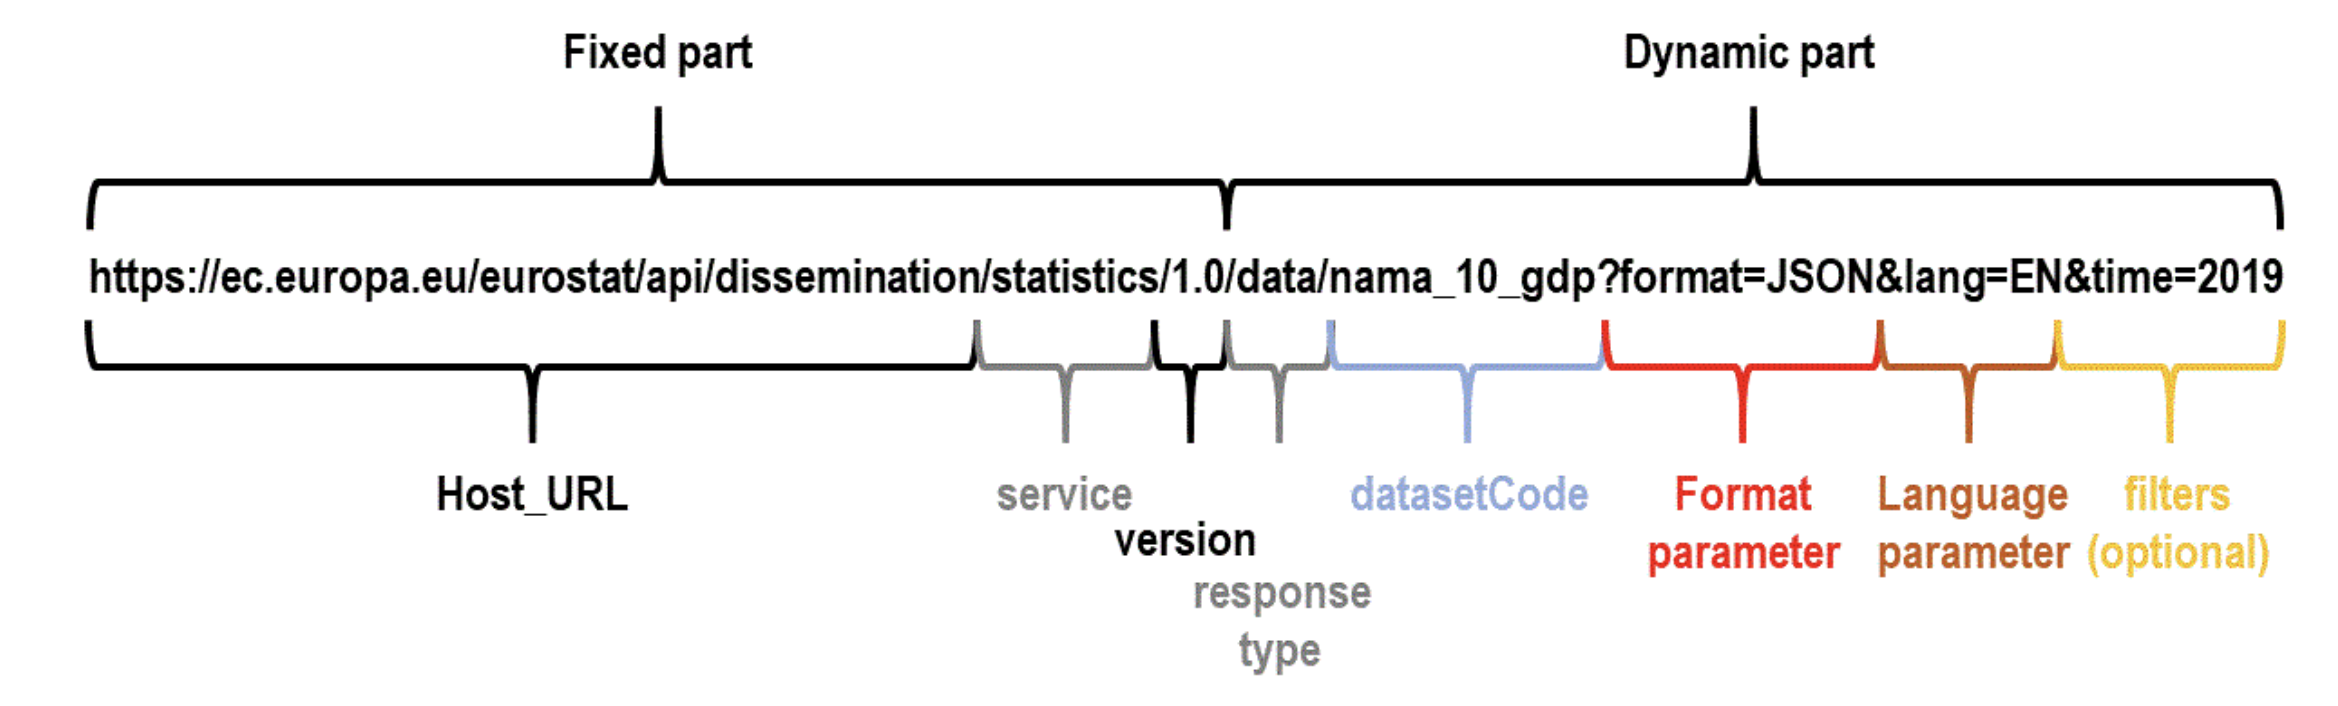

- [Eurostat API](https://wikis.ec.europa.eu/display/EUROSTATHELP/API+-+Getting+started+with+statistics+API)
- [Socrata Open DATA (SODA) API](https://dev.socrata.com/docs/endpoints.html)
  - Also look at [how to query more than 1000 rows](https://support.socrata.com/hc/en-us/articles/202949268-How-to-query-more-than-1000-rows-of-a-dataset)

In [1]:
# Let's access data via the SODA API provided by YYC Open Data Portal,
# (Socrata)

baseURL = 'https://data.calgary.ca/resource/crbp-innf.json'

# By default, the API returns 1000 records. Can request more by specifying a limit.
# For this data set, the following limit should be able to read the entire dataset.
# Be aware of API limits. Also, think about whether you need all the data or can 
# perhaps query/filter data at source.

params = '?$limit=400000' 
epURL = baseURL + params

In [2]:
import pandas as pd

In [3]:
# Read the data using pandas
cecDF = pd.read_json(epURL)

In [4]:
# Reading from the API should preserve schema
print(cecDF.info())
display(cecDF.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352157 entries, 0 to 352156
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   business_unit_desc  352157 non-null  object
 1   facilityname        352157 non-null  object
 2   site_id             352157 non-null  object
 3   facilityaddress     352157 non-null  object
 4   energy_description  352157 non-null  object
 5   year                352157 non-null  int64 
 6   month               352157 non-null  object
 7   total_consumption   352157 non-null  int64 
 8   unit                352157 non-null  object
dtypes: int64(2), object(7)
memory usage: 24.2+ MB
None


,business_unit_desc,facilityname,site_id,facilityaddress,energy_description,year,month,total_consumption,unit
0,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Apr,1107,Kwh
1,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Aug,1130,Kwh
2,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Dec,1775,Kwh
3,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Feb,2320,Kwh
4,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Jan,1883,Kwh


,facilityname,SUM_total_consumption
0,CALGARY STREET LIGHTING,43073474
1,BEARSPAW WATER TREATMENT PLANT,36443236
2,BONNYBROOK WWTP UTILITY BUILDING 'B',26875883
3,GLENMORE WATER TREATMENT PLANT,20840956
4,PINE CREEK WASTEWATER TREATMENT PLANT,19836870
...,...,...
1004,COV106,1
1005,HIL056 - RILEY PARK; RILEY PARK DEPOT,1
1006,PAN030,0
1007,TUS643,0


<Axes: xlabel='facilityname'>

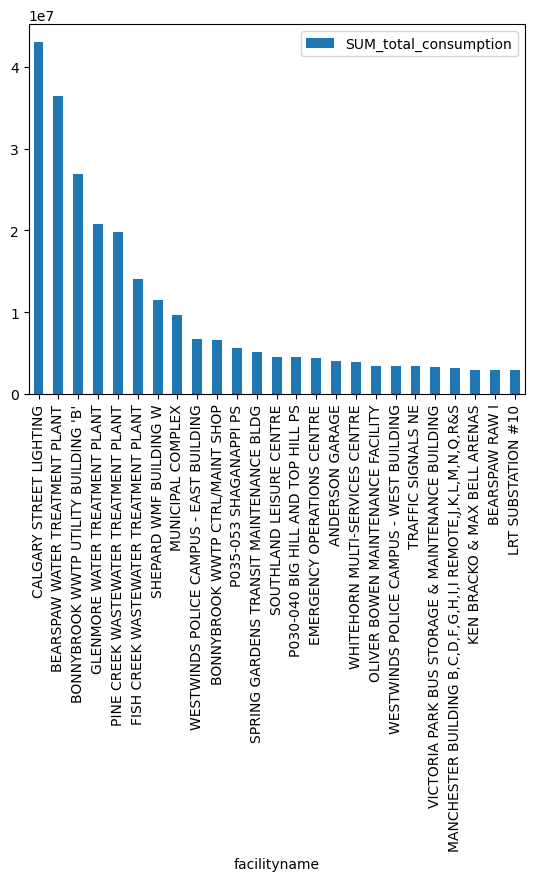

In [5]:
# In data-intensive applications, we don't want to be moving a lot of data around. 
# We should filter data at the source and ingest only what's needed.
# SODA provides filtering operations for this via SODA Query Language (SoQL)

# Example: Total consumption for a particular year grouped by facility

filter = '&$select=facilityname,SUM(total_consumption)&year=2023&unit=Kwh&$group=facilityname&$order=SUM_total_consumption%20DESC'
filterDF = pd.read_json(epURL + filter)
display(filterDF)

# Plot Top 25 consumers
filterDF = filterDF.head(25).set_index('facilityname')
filterDF.plot(kind='bar')